# AUNLE

In [1]:
from experiments_utils.fetching import ResultsManager
r = ResultsManager("iclr_experiments_2")

In [ ]:
inference_times = {}
train_times = {}
total_times = {}
for ns in ((1000,), (10000,), (100000,)): 
    inf_t = []
    train_t = []
    total_t = []
    for task in ("lotka_volterra", "slcp", "two_moons", "gaussian_linear_uniform"):
        result = r.fetch_one_result(
            task=task, ebm_model_type="joint_tilted", num_samples=ns, inference_num_warmup_steps=2000, num_observation=1,  max_iter=2000, num_smc_steps=20
        ).result
        train_t.append(result.train_results.single_round_results[0].train_results.time)
        inf_t.append(result.train_results.single_round_results[0].inference_time)
        total_t.append(result.train_results.total_time)
    inference_times[sum(ns)] = inf_t
    total_times[sum(ns)] = total_t
    train_times[sum(ns)] = train_t
        
    # ress[sum(ns)] = result.train_results.w

In [3]:
aunle_total_times = total_times

# SUNLE

In [4]:
inference_times = {}
train_times = {}
total_times = {}
for ns in ((100,) * 10, (1000,) * 10, (10000,) * 10): 
    inf_t = []
    train_t = []
    total_t = []
    for task in ("lotka_volterra", "slcp", "two_moons", "gaussian_linear_uniform"):
        result = r.fetch_one_result(
            experience_name="paper", task=task, ebm_model_type="likelihood", num_samples=ns, inference_num_warmup_steps=2000, num_observation=1,  max_iter=2000, num_mala_steps=200
        ).result
        train_t.append(result.train_results.single_round_results[0].train_results.time)
        inf_t.append(result.train_results.single_round_results[0].inference_time)
        total_t.append(result.train_results.total_time)
    inference_times[sum(ns)] = inf_t
    total_times[sum(ns)] = total_t
    train_times[sum(ns)] = train_t
        
    # ress[sum(ns)] = result.train_results.w

In [5]:
sunle_total_times = total_times

In [7]:
num_simulations_str_map = {"10⁵": 100000, "10⁴": 10000, "10³": 1000}
num_simulations_str_reverse_map = {100000:"10⁵", 10000: "10⁴", 1000:"10³"}

In [ ]:
jnp.array([jnp.std(jnp.array(inference_times[n])) for n in inference_times]),


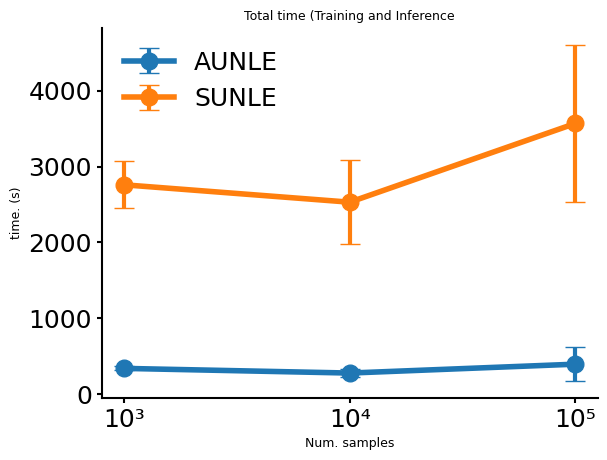

In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import jax.numpy as jnp
errorbar_kws = dict(
    linewidth=4,
    elinewidth=3,
    markersize=12,
    capsize=7,
    marker="o"
)


with mpl.rc_context(fname='.matplotlibrc'):
    mpl.rc('font',family='DejaVu Sans')
    
    f, ax = plt.subplots()
    
#     ax1.legend(fontsize=18)
#     ax1.set_ylim(0, 100)
    
    import matplotlib.ticker as mtick
    ax.errorbar(
        [num_simulations_str_reverse_map[n] for n in aunle_total_times],
        jnp.array([jnp.mean(jnp.array(aunle_total_times[n])) for n in aunle_total_times]),
        jnp.array([jnp.std(jnp.array(aunle_total_times[n])) for n in aunle_total_times]),
        label="AUNLE",
        **errorbar_kws
    )
    ax.errorbar(
        [num_simulations_str_reverse_map[n] for n in sunle_total_times],
        jnp.array([jnp.mean(jnp.array(sunle_total_times[n])) for n in sunle_total_times]),
        jnp.array([jnp.std(jnp.array(sunle_total_times[n])) for n in sunle_total_times]),
        label="SUNLE",
        **errorbar_kws
    )
    
    ax.legend(fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    ax.set_title('Total time (Training and Inference')
    ax.set_xlabel('Num. samples')
    ax.set_ylabel('time. (s)')
f.savefig('figures/unle_time.png', bbox_inches="tight", dpi=300)
    
    
    # ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
    # 
    # ax1.set_ylabel("Frac. Valid Samples", fontsize=14)
    # ax1.set_xlabel("Round No.", fontsize=14)
    # 
    # ax2.plot(
    #     list(range(len(mets_snle.frac_valid_obs_per_round))),
    #     list(map(lambda x: x*100, mets_snle.frac_valid_obs_per_round)),
    #     "b-+",
    #     label="SNVI"
    # )
    #     list(range(len(mets_nuts.frac_valid_obs_per_round))),
    #     list(map(lambda x: x*100, mets_sunle.frac_valid_obs_per_round)),
    #     "r-+",
    #     label="S-UNLE"
    # )
    # ax2.legend(fontsize=18)
    # ax2.set_ylim(0, 100)
    # 
    # import matplotlib.ticker as mtick
    # ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
    # 
    # ax2.set_ylabel("Frac. Valid Samples", fontsize=14)
    # ax2.set_xlabel("Round No.", fontsize=14)
    # 
# f.savefig("figures/snvi_vs_sunle_frac_valid_samples.pdf")